In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline

In [5]:
train = pd.read_excel('2.1. fraudTrain.xlsx')
test = pd.read_excel('2.2. fraudTest.xlsx')

In [4]:
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 150) # display all rows
sns.set_style('whitegrid') # set the grid style
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' # remove the background color
plt.rcParams['xtick.color'] = 'white'  
plt.rcParams['ytick.color'] = 'white'  

In [6]:
from sklearn.model_selection import train_test_split
train_sample = train.sample(frac=0.1, random_state=42) # 10% sample of the data
train_sample, train_val = train_test_split(train_sample, test_size=0.25, random_state=42) # 75% train, 25% validation

In [7]:
train_sample.shape, train_val.shape

((78643, 23), (26215, 23))

In [7]:
train_sample.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
382661,382661,2019-06-24 15:38:17,30273037698427,fraud_Stiedemann Ltd,food_dining,1.92,Andrew,Patterson,M,06959 Stephen Branch Suite 246,Thida,AR,72165,35.5762,-91.4539,111,Careers information officer,2000-06-13,08a3a0e5bf710d0e866731514cda5c9f,1340552297,36.072938,-91.947932,0
505568,505568,2019-08-07 15:12:23,3513618443244540,fraud_Nienow PLC,entertainment,73.25,Amber,Perez,F,954 Reyes Ways,Fulton,SD,57340,43.7588,-97.8712,355,Financial adviser,1955-06-26,26605441c6cc358a7759ea2ce03b7471,1344352343,43.583311,-98.733287,0
160698,160698,2019-03-26 02:34:14,4378993458389620,fraud_Koepp-Witting,grocery_pos,118.45,Travis,Hayes,M,1561 Chase Grove,Conway,NH,3818,43.9742,-71.1503,3807,Surgeon,1999-10-25,111c0733e3b0f0166f0541a164c3f549,1332729254,44.132304,-70.585401,0
252453,252453,2019-05-05 23:54:36,5456776410929280,fraud_Kub-Heaney,health_fitness,36.48,Taylor,Khan,F,658 Diane Glen Apt. 677,North Washington,PA,16048,41.0472,-79.8089,139,Patent attorney,1954-05-25,3640cc9f2c44e15055e04f51f6c01a2e,1336262076,40.765927,-80.265882,0
845278,845278,2019-12-14 18:17:27,3585740823295290,fraud_Bins-Howell,personal_care,85.13,James,Greene,M,082 Hernandez Bypass Apt. 886,Quanah,TX,79252,34.2956,-99.7494,3202,"Librarian, public",1998-03-18,15adf89741bfb2387e78053df2962a8f,1355509047,34.650810,-99.895160,0


In [8]:
train_sample.nunique()

Unnamed: 0               78643
trans_date_trans_time    78533
cc_num                     936
merchant                   693
category                    14
amt                      19224
first                      343
last                       473
gender                       2
street                     936
city                       856
state                       51
zip                        923
lat                        921
long                       922
city_pop                   842
job                        485
dob                        922
trans_num                78643
unix_time                78533
merch_lat                78485
merch_long               78565
is_fraud                     2
dtype: int64

In [8]:
train_sample.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [9]:
test.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [12]:
train_val.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [ ]:
train_sample.drop(columns=['first','last'],inplace=True)

In [ ]:
test.drop(columns=['first','last'],inplace=True)

In [16]:
train_val.drop(columns=['first','last'],inplace=True)

In [17]:
from datetime import datetime
train_sample['age'] = datetime.now().year - train_sample['dob'].dt.year

In [18]:
test['age'] = datetime.now().year - test['dob'].dt.year

In [19]:
train_val['age'] = datetime.now().year - train_val['dob'].dt.year

In [20]:
train_sample.drop(columns=['dob'], inplace=True)

In [21]:
test.drop(columns=['dob'], inplace=True)

In [22]:
train_val.drop(columns=['dob'], inplace=True)

In [13]:
train_sample.nunique()

cc_num        936
merchant      693
category       14
amt         19224
gender          2
street        936
city          856
state          51
zip           923
lat           921
long          922
city_pop      842
job           485
is_fraud        2
age            80
dtype: int64

In [14]:
px.histogram(train_sample, x='city_pop', color='is_fraud', barmode='group') # try changing x to see the distribution

In [30]:
test_sample = test.sample(frac=0.05, random_state=42) # 5% sample of the data

In [32]:
train_sample.shape, test_sample.shape, train_val.shape

((78643, 15), (27786, 15), (26215, 15))

<Axes: >

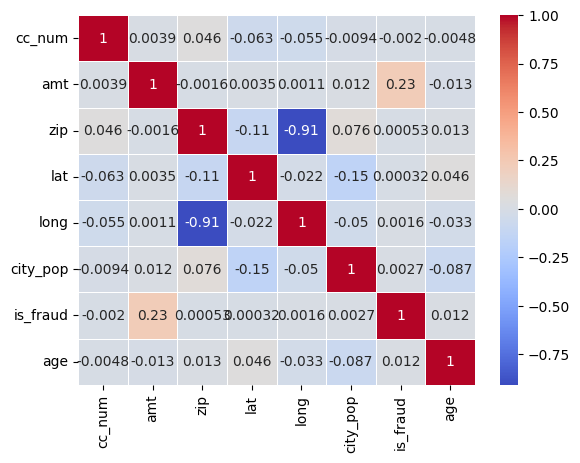

In [33]:
numerical_cols = train_sample.select_dtypes(include=(np.number)).columns
categorical_cols = train_sample.select_dtypes(include=('object')).columns
correlation_matrix = train_sample[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [34]:
train_sample[numerical_cols].head()

,cc_num,amt,zip,lat,long,city_pop,is_fraud,age
382661,30273037698427,1.92,72165,35.5762,-91.4539,111,0,24
505568,3513618443244540,73.25,57340,43.7588,-97.8712,355,0,69
160698,4378993458389620,118.45,3818,43.9742,-71.1503,3807,0,25
252453,5456776410929280,36.48,16048,41.0472,-79.8089,139,0,70
845278,3585740823295290,85.13,79252,34.2956,-99.7494,3202,0,26


In [35]:
train_sample[categorical_cols].head()

,merchant,category,gender,street,city,state,job
382661,fraud_Stiedemann Ltd,food_dining,M,06959 Stephen Branch Suite 246,Thida,AR,Careers information officer
505568,fraud_Nienow PLC,entertainment,F,954 Reyes Ways,Fulton,SD,Financial adviser
160698,fraud_Koepp-Witting,grocery_pos,M,1561 Chase Grove,Conway,NH,Surgeon
252453,fraud_Kub-Heaney,health_fitness,F,658 Diane Glen Apt. 677,North Washington,PA,Patent attorney
845278,fraud_Bins-Howell,personal_care,M,082 Hernandez Bypass Apt. 886,Quanah,TX,"Librarian, public"


In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(train_sample[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [37]:
train_sample[encoded_cols] = encoder.transform(train_sample[categorical_cols]).toarray()

C:\Users\HP\AppData\Local\Temp\ipykernel_12648\228919584.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_sample[encoded_cols] = encoder.transform(train_sample[categorical_cols]).toarray()
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\228919584.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_sample[encoded_cols] = encoder.transform(train_sample[categorical_cols]).toarray()
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\228919584.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

In [50]:
train_sample.shape

(78643, 3052)

In [62]:
target_col = 'is_fraud'
numerical_cols = numerical_cols.drop('cc_num')

In [69]:
from sklearn.preprocessing import StandardScaler
train_sample[numerical_cols] = StandardScaler().fit_transform(train_sample[numerical_cols])
train_val[numerical_cols] = StandardScaler().fit_transform(train_val[numerical_cols])
test[numerical_cols] = StandardScaler().fit_transform(test[numerical_cols])

In [70]:
train_sample[numerical_cols]

,amt,zip,lat,long,city_pop,age
382661,-0.480215,0.869213,-0.584466,-0.086520,-0.292978,-1.540940
505568,0.025803,0.318264,1.020359,-0.549910,-0.292153,1.058666
160698,0.346453,-1.670800,1.062605,1.379593,-0.280487,-1.483171
252453,-0.235045,-1.216290,0.488542,0.754360,-0.292883,1.116435
845278,0.110080,1.132590,-0.835625,-0.685534,-0.282531,-1.425402
...,...,...,...,...,...,...
1012404,-0.430415,-0.346999,-1.308996,0.090813,-0.277898,-0.847712
210079,0.009699,-1.755272,0.731269,1.338420,-0.174053,-0.096715
626348,-0.086851,0.148353,0.613789,-0.008295,-0.288534,0.943128
367942,-0.365291,-1.345359,0.569013,1.161838,-0.285722,2.098508


In [73]:
train_sample[encoded_cols].shape

(78643, 3037)

In [74]:
train_sample[numerical_cols].shape

(78643, 6)

In [76]:
x_train = train_sample[encoded_cols + list(numerical_cols)]

In [77]:
x_train.shape

(78643, 3043)

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_train)
n_components = pca.n_components_
n_components

1015

Number of components to retain 95.0% variance: 1015


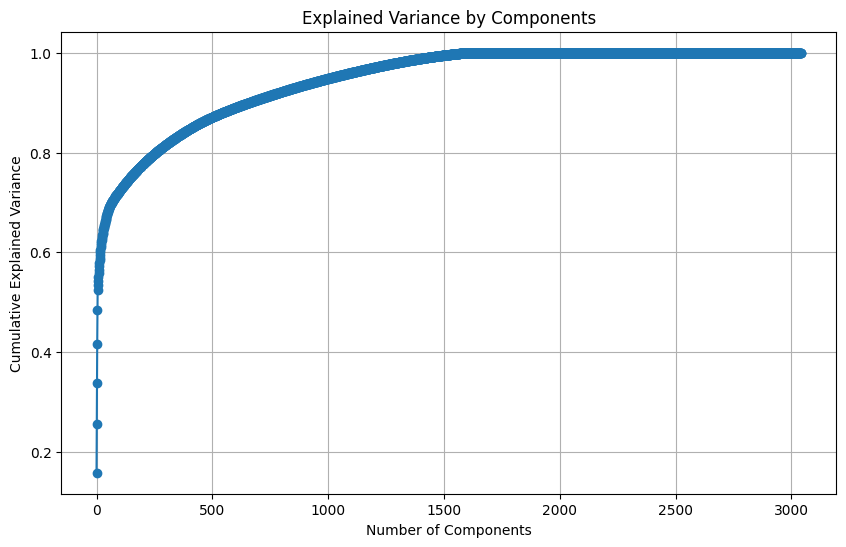

In [81]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_train)  # Fit PCA without specifying n_components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)

# Find the number of components for a desired explained variance, e.g., 0.95
desired_variance = 0.95
components_for_desired_variance = np.where(cumulative_variance_ratio >= desired_variance)[0][0] + 1
print(f"Number of components to retain {desired_variance*100}% variance: {components_for_desired_variance}")

In [82]:
from sklearn.decomposition import IncrementalPCA
reduced_cols = IncrementalPCA(n_components = n_components, batch_size = n_components).fit_transform(x_train)

In [83]:
reduced_cols.shape

(78643, 1015)

In [144]:
from sklearn.ensemble import IsolationForest
predictor = IsolationForest(n_estimators=200, random_state=42, contamination=0.01).fit_predict(reduced_cols)
predictor = np.where(predictor == -1, 2, predictor)  # Temporarily replace -1 with 2 to avoid conflict
predictor = np.where(predictor == 1, 0, predictor)  # Replace 1 with 0
predictor = np.where(predictor == 2, 1, predictor)  # Finally, replace 2 (originally -1) with 1

In [145]:
np.unique(predictor,return_counts=True)

(array([0, 1]), array([77856,   787], dtype=int64))

In [146]:
from sklearn.metrics import classification_report
print(classification_report(train_sample[target_col], predictor))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     78197
           1       0.01      0.02      0.02       446

    accuracy                           0.98     78643
   macro avg       0.50      0.51      0.51     78643
weighted avg       0.99      0.98      0.99     78643



In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_sample[target_col], predictor)

array([[77421,   776],
       [  435,    11]], dtype=int64)

In [148]:
from sklearn.metrics import roc_auc_score
auc_roc_score = roc_auc_score(train_sample[target_col], predictor)
print("AUC-ROC Score:", auc_roc_score)

AUC-ROC Score: 0.5073700113849515
